In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Load the Excel file skipping the initial rows with the message
df = pd.read_excel('NileULex_v0.27.xlsx', skiprows=10, names=['Term', 'Polarity', 'Egyptian', 'MSA'])

# Check the first few rows of the DataFrame to verify column names and data
print(df.head())

               Term      Polarity  Egyptian  MSA
0         اتقي الله  compound_neg         0    1
1           اتقي شر  compound_neg         0    1
2     اتكسف علي دمك  compound_neg         1    0
3  اتكسفوا علي دمكم  compound_neg         1    0
4  اتمسح بينا الأرض  compound_neg         1    0


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.dropna(inplace=True)

In [4]:
# Specify the number of random samples you want to choose
def generate_random_sample(df, n_samples=15):
    return df.sample(n=n_samples)
random_samples = generate_random_sample(df)
print(random_samples)

                Term      Polarity  Egyptian  MSA
5689           نرحمك      positive         0    1
5798             وضح      positive         0    1
594      الله يحميكم  compound_pos         0    1
1113          احتيال      negative         0    1
1367           انتهي      negative         1    0
46    الله يخرب بيتك  compound_neg         1    0
1228          اشتباك      negative         0    1
813         فاعل خير  compound_pos         0    1
1712            تبلد      negative         0    1
2313           حلوف       negative         1    0
4564            يقتص      negative         0    1
3871            ندام      negative         1    0
3545           مشانق      negative         0    1
1354          انتحار      negative         0    1
4142          هتكرهك      negative         1    0


# Calculate the total number of rows in the dataset

In [5]:
total_rows = len(df)
# Count the occurrences of each type of polarity in the Polarity column
polarity_counts = df['Polarity'].value_counts()
descriptive_stats = df.describe()
print(total_rows)
print(polarity_counts)
print(descriptive_stats)

5943
negative        3693
positive        1281
compound_neg     553
compound_pos     416
Name: Polarity, dtype: int64
          Egyptian          MSA
count  5943.000000  5943.000000
mean      0.448595     0.551405
std       0.497392     0.497392
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     1.000000
75%       1.000000     1.000000
max       1.000000     1.000000


# Perform Exploratory Data Analysis (EDA)
# Create visualizations to explore the distribution of the Polarity column

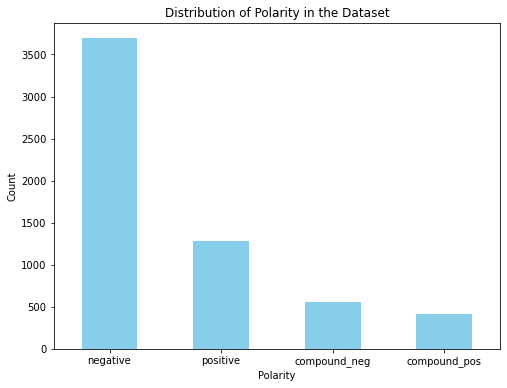

Dataset Description:
          Egyptian          MSA
count  5943.000000  5943.000000
mean      0.448595     0.551405
std       0.497392     0.497392
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     1.000000
75%       1.000000     1.000000
max       1.000000     1.000000

Number of Rows in the Dataset: 5943

Number of Positive, Negative, Compound_Pos, and Compound_Neg in the Polarity column:
negative        3693
positive        1281
compound_neg     553
compound_pos     416
Name: Polarity, dtype: int64

Percentage of Each Polarity:
negative        62.140333
positive        21.554770
compound_neg     9.305065
compound_pos     6.999832
Name: Polarity, dtype: float64


In [6]:
import matplotlib.pyplot as plt

# Bar plot for Polarity counts
plt.figure(figsize=(8, 6))
polarity_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Polarity in the Dataset')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Calculate the percentage of each type of polarity in the dataset
polarity_percentages = (polarity_counts / total_rows) * 100

# Print the dataset description, number of rows, and polarity counts
print("Dataset Description:")
print(descriptive_stats)
print("\nNumber of Rows in the Dataset:", total_rows)
print("\nNumber of Positive, Negative, Compound_Pos, and Compound_Neg in the Polarity column:")
print(polarity_counts)
print("\nPercentage of Each Polarity:")
print(polarity_percentages)

# Model Loading and Training

# Knowledge Distillation:

In [7]:
random_samples = generate_random_sample(df)
print(random_samples)

            Term      Polarity  Egyptian  MSA
3588     معتقلين      negative         0    1
1128      اختناق      negative         0    1
1140       اخطاؤ      negative         0    1
5560      مسانده      positive         0    1
1329     الركاكه      negative         0    1
4146         هجر      negative         0    1
4537       يغتصب      negative         0    1
5471       مبتكر      positive         0    1
2157       تنهبو      negative         1    0
5341       عداله      positive         0    1
4324       يتقبض      negative         0    1
3751    ميلزمنيش      negative         1    0
711   رافع راسنا  compound_pos         1    0
1583         بلع      negative         1    0
2094        تكسف      negative         1    0


In [11]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Polarity'])

print("Training Set:")
print(train_df)
print("\nTesting Set:")
print(test_df)

Training Set:
             Term      Polarity  Egyptian  MSA
4828        ايدتم      positive         0    1
1586         بلوم      negative         1    0
5568     مستنضفهم      positive         1    0
2419        خنزير      negative         0    1
1168         ارفض      negative         0    1
...           ...           ...       ...  ...
3526      مسجونين      negative         0    1
2401          خطر      negative         0    1
1493       بتغابي      negative         1    0
2713   شكله مستفز      negative         1    0
392   مافيش فايده  compound_neg         1    0

[4754 rows x 4 columns]

Testing Set:
                   Term      Polarity  Egyptian  MSA
3841               نحسد      negative         0    1
604   الله يمسيه بالخير  compound_pos         1    0
3091             فياجرا      negative         1    0
350          لا مبرر له  compound_neg         0    1
1935               تشجب      negative         0    1
...                 ...           ...       ...  ...
4570        

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Split the data into teacher and student sets
teacher_train_df, teacher_test_df = train_test_split(train_df, test_size=0.2, random_state=42)
student_train_df, student_test_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Print the training and testing sets
print("Teacher Training Set:")
print(teacher_train_df)
print("\nTeacher Testing Set:")
print(teacher_test_df)
print("\nStudent Training Set:")
print(student_train_df)
print("\nStudent Testing Set:")
print(student_test_df)

Teacher Training Set:
          Term      Polarity  Egyptian  MSA
4468   يسحلونك      negative         1    0
2483     راكبك      negative         1    0
4215     هيسقط      negative         1    0
3009       غور      negative         1    0
3895      نزعل      negative         1    0
...        ...           ...       ...  ...
4754    اعشقكم      positive         0    1
1737     تتشتم      negative         1    0
1266    اعتصمت      negative         0    1
2343      خانو      negative         1    0
205   ربنا يخد  compound_neg         1    0

[3803 rows x 4 columns]

Teacher Testing Set:
         Term  Polarity  Egyptian  MSA
5562   مستحسن  positive         0    1
1523    بذمتك  negative         1    0
5351    عسليه  positive         1    0
3925     نسكت  negative         0    1
2088   تكذبوا  negative         0    1
...       ...       ...       ...  ...
3186      كذب  negative         0    1
3507   مساومه  negative         0    1
1701    تايهه  negative         1    0
1018  اتخميتم

# Command R+

In [13]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained("CohereForAI/c4ai-command-r-plus")
tokenizer = AutoTokenizer.from_pretrained("CohereForAI/c4ai-command-r-plus")

model-00001-of-00044.safetensors:   0%|          | 0.00/6.29G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

trainer = ImageDistilTrainer(
    student_model=student_model,
    teacher_model=teacher_model,
    training_args=training_args,
    train_dataset=processed_datasets[teacher_train_df],
    eval_dataset=processed_datasets[teacher_test_df],
    data_collator=data_collator,
    tokenizer=teacher_processor,
    compute_metrics=compute_metrics,
    temperature=5,
    lambda_param=0.5
)

trainer.train()

# Evaluate the Student Model

In [ ]:
trainer.evaluate(processed_datasets["student_test_df"])

# Pruning

In [15]:
from optimum.intel.neural_compressor import INCTrainer
from neural_compressor import WeightPruningConfig
from transformers import TrainingArguments, Trainer

pruning_config = WeightPruningConfig(
    pruning_type="magnitude",
    start_step=0,
    end_step=15,
    target_sparsity=0.2,
    pruning_scope="local"
)

ModuleNotFoundError: No module named 'optimum'

In [17]:
trainer = trainer(
    model=model,
    args=training_args,
    train_dataset=processed_datasets[student_train_df],
    eval_dataset=processed_datasets[student_test_df],
    data_collator=default_data_collator,
    pruning_config=pruning_config
)

trainer.train()

NameError: name 'trainer' is not defined

Trial1: 
Mistral-7B-v0.1 - You must be authenticated to access it.

In [ ]:
#from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load the Arabic-specific model
#model_name = "mistralai/Mistral-7B-v0.1"
#model = AutoModelForSequenceClassification.from_pretrained(model_name)
#tokenizer = AutoTokenizer.from_pretrained(model_name)
